### Step 1: solver

Takes in any variables that seem useful and a set of equations and returns a solution for the variables.

### Step 2: component picker

Finds the nearest component values to the solution

### Step 3: checker

Checks the proposed values against the equations to see if it is correct, just reruns the solver with the proposed values and checks if the solution is 'within tolerance' of the proposed values.

In [2]:
from sympy import symbols, Eq, solve

# Define all symbols
R1, R2, Vin, Vout, I, ratio, r_total = symbols('R1 R2 Vin Vout I ratio r_total')

# Define the equations
equation1 = Eq(Vout, Vin * (R2 / (R1 + R2)))
equation2 = Eq(I, Vin / (R1 + R2))
equation3 = Eq(ratio, R2 / (R1 + R2))
equation4 = Eq(r_total, R1 + R2)

# Function to solve the equations based on specified values
def solve_circuit(values):
    substituted_eqs = [eq.subs(values) for eq in [equation1, equation2, equation3, equation4]]

    # Determine which variables are still unknown
    unknowns = [var for var in [R1, R2, Vin, Vout, I, ratio, r_total] if var not in values]

    # Solve the equations for the unknowns
    solutions = solve(substituted_eqs, unknowns)

    # Check the type of the solution and convert to dictionary if necessary
    if isinstance(solutions, list):
        # Assuming only one solution set in the list
        solution_dict = {str(unknown): sol for unknown, sol in zip(unknowns, solutions[0])}
    else:
        # Solution is already a dictionary
        solution_dict = solutions

    return solution_dict

# Example usage
print(solve_circuit({Vout: 2, Vin: 10}))
print(solve_circuit({R1: 10, R2: 10, Vin: 10}))
print(solve_circuit({R1: 10, R2: 10, Vin: 10}))

{'R1': 8000.00000000000, 'R2': 2000.00000000000, 'ratio': 0.200000000000000, 'r_total': 10000.0000000000}
{I: 1/2, Vout: 5, r_total: 20, ratio: 1/2}
{I: 1/2, Vout: 5, r_total: 20, ratio: 1/2}


In [13]:
# Solve
import eseries
solution = solve_circuit({I: 0.001, Vout: 2, Vin: 10})

# Find the nearest E24 values
r1 = eseries.find_nearest(eseries.E24, solution["R1"])
r2 = eseries.find_nearest(eseries.E24, solution["R2"])

# Check the results are within tolerance
tolerance = 0.05

proposed_solution = solve_circuit({R1: r1, R2: r2, Vin: 10})

proposed_solution



{I: 0.000980392156862745,
 Vout: 1.96078431372549,
 r_total: 10200.0000000000,
 ratio: 0.196078431372549}

In [20]:
import itertools
import eseries

# find every possible combination of 2 two groups of resistors, each with a tolerance of x%

tolerance = 0.05

# Find all possible combinations of 2 resistors, each within tolerance of x% of the nominal value

resistor_nominal_1 = 1000
resistor_tolerance = 0.05

resistor_nominal_2 = 1000
resistor_tolerance = 0.05

#find nearest E24 values

r1 = eseries.find_nearest(eseries.E24, resistor_nominal_1)
r2 = eseries.find_nearest(eseries.E24, resistor_nominal_2)

# find max and min values for each resistor
r1_min = r1 * (1 - resistor_tolerance)
r1_max = r1 * (1 + resistor_tolerance)

r2_min = r2 * (1 - resistor_tolerance)
r2_max = r2 * (1 + resistor_tolerance)

# find all combinations of r1 and r2 max and min values
r1_combinations = [r1_min, r1_max]
r2_combinations = [r2_min, r2_max]

# find all possible combinations of r1 and r2
r1_r2_combinations = list(itertools.product(r1_combinations, r2_combinations))

r1_r2_combinations

# Vin = 10 +/ 3%

# find all possible combinations of r1, r2 and Vin
r1_r2_Vin_combinations = list(itertools.product(r1_r2_combinations, [10 * (1 - 0.03), 10 * (1 + 0.03)]))

r1_r2_Vin_combinations

# find Vout for each combination

for r1_r2_Vin in r1_r2_Vin_combinations:
    r1_r2 = r1_r2_Vin[0]
    Vin = r1_r2_Vin[1]
    Vout = Vin * (r1_r2[1] / (r1_r2[0] + r1_r2[1]))
    # calculate the error for each combination
    error = abs(2 - Vout)
    print("R1: {}, R2: {}, Vin: {}, Vout: {}, error: {}%".format(r1_r2[0], r1_r2[1], Vin, Vout, error))


R1: 950.0, R2: 950.0, Vin: 9.7, Vout: 4.85, error: 2.8499999999999996%
R1: 950.0, R2: 950.0, Vin: 10.3, Vout: 5.15, error: 3.1500000000000004%
R1: 950.0, R2: 1050.0, Vin: 9.7, Vout: 5.0925, error: 3.0925000000000002%
R1: 950.0, R2: 1050.0, Vin: 10.3, Vout: 5.407500000000001, error: 3.4075000000000006%
R1: 1050.0, R2: 950.0, Vin: 9.7, Vout: 4.607499999999999, error: 2.607499999999999%
R1: 1050.0, R2: 950.0, Vin: 10.3, Vout: 4.8925, error: 2.8925%
R1: 1050.0, R2: 1050.0, Vin: 9.7, Vout: 4.85, error: 2.8499999999999996%
R1: 1050.0, R2: 1050.0, Vin: 10.3, Vout: 5.15, error: 3.1500000000000004%


In [ ]:
import eseries
from sympy import N

solution = solve_circuit({I: 0.001, Vout: 2, Vin: 10})

# Convert SymPy solutions to float for eseries compatibility
r1_val = float(N(solution["R1"]))
r2_val = float(N(solution["R2"]))

# Find the nearest E24 values
r1 = eseries.find_nearest_few(eseries.E24, r1_val, 3)
r2 = eseries.find_nearest_few(eseries.E24, r2_val, 3)

# Check the results are within tolerance
tolerance = 0.05
print(r1)
print(r2)

# Iterate through the list of possible solutions
for i in range(len(r1)):
    for j in range(len(r2)):
        proposed_solution = solve_circuit({R1: r1[i], R2: r2[j], Vin: 10})

        try:
            # Directly access 'Vout' from the solution
            print(proposed_solution)
            proposed_vout = float(N(proposed_solution["Vout"]))

            if 2 * (1 - tolerance) <= proposed_vout <= 2 * (1 + tolerance):
                print("R1 = ", r1[i], "R2 = ", r2[j])
                print(proposed_solution)
                break
        except KeyError:
            # Handle cases where 'Vout' is not in the solution
            print(f"No 'Vout' found for R1 = {r1[i]} and R2 = {r2[j]}")
            continue

    else:
        continue
    break











(7500.0, 8200.0, 9100.0)
(1800.0, 2000.0, 2200.0)
No 'Vout' found for R1 = 7500.0 and R2 = 1800.0
No 'Vout' found for R1 = 7500.0 and R2 = 2000.0
No 'Vout' found for R1 = 7500.0 and R2 = 2200.0
No 'Vout' found for R1 = 8200.0 and R2 = 1800.0
No 'Vout' found for R1 = 8200.0 and R2 = 2000.0
No 'Vout' found for R1 = 8200.0 and R2 = 2200.0
No 'Vout' found for R1 = 9100.0 and R2 = 1800.0
No 'Vout' found for R1 = 9100.0 and R2 = 2000.0
No 'Vout' found for R1 = 9100.0 and R2 = 2200.0


In [9]:
from sympy import symbols, solve_univariate_inequality

inequality1 = R1 > 10
inequality2 = R1 < 11
solution1 = solve_univariate_inequality(inequality1, R1)
solution2 = solve_univariate_inequality(inequality2, R1)



In [10]:
import unyts as ut

# ut.volts(10, 'V')

resistance = 100 * ut.ohm

resistance

INFO:preparing units dictionary...
INFO:preparing units network...
INFO:saving units network and dictionary to cache...


100_Ω

In [11]:
import pint

ureg = pint.UnitRegistry()

(ureg.millimeter / ureg.kilometer)


<Unit('millimeter / kilometer')>

In [12]:
#ato code example

#### Vdiv class ####
r1: Resistance = 3R | 3ohm
r2: Resistance = 4K
vout: voltage = 10V
i(amps)
rtotal(ohms)

vout = vin * (r2 / (r1 + r2))

i = vin / (r1 + r2)

rtotal = r1 + r2

r_top.value = r1
r_bt.value = r2


#### Instance of Vdiv class ####

vdiv = new Vdiv

vdiv.vin = 12V
vdiv.vout = 10V
# vdiv.i = 0.001A
vdiv.rtotal = 1000Kohms


component Resistor:
    signal p1 ~ pin 1
    signal p2 ~ pin 2

    resistance = unknown ohms

module Vdiv:
    r1 = new Resistor 
    r2 = new Resistor

    signal in
    signal out
    signal gnd

    variable current = in.current
    variable rtotal = unknown ohms


    # equations
    out.voltage:  = in.voltage * (r2.resistance / (r1.resistance + r2.resistance))
    in.current = in.voltage / (r1.resistance + r2.resistance)
    rtotal = r1.resistance + r2.resistance
    ratio Ohms = r2.resistance / (r1.resistance + r2.resistance) kohm


vdiv = new Vdiv
vdiv.current = 0.01A
vdiv.in.current = 0.01A

vdiv.ratio = 0.5
vdiv.rtotal = 1000

SyntaxError: invalid decimal literal (2890117398.py, line 4)

In [ ]:
import re

def parse_unit(unit_str):
    # Define prefixes and their multipliers
    prefixes = {
        'm': 1e-3,  # milli
        'u': 1e-6,  # micro
        'k': 1e3,   # kilo
        'M': 1e6,   # Mega
        # ... add more prefixes as needed
    }

    # Define the regex pattern for parsing
    pattern = r'(\d*\.?\d+)([a-zA-Z]*)'

    # Search for matches using the regex pattern
    match = re.match(pattern, unit_str)
    if not match:
        raise ValueError(f"Invalid unit format: {unit_str}")

    # Extract value and unit from the match
    value_str, unit_with_prefix = match.groups()

    # Convert the value string to a float
    value = float(value_str)

    # Check if the unit has a prefix and separate it
    prefix = ''
    for p in prefixes:
        if unit_with_prefix.startswith(p):
            prefix = p
            break

    # Remove the prefix from the unit if it exists
    unit = unit_with_prefix[len(prefix):] if prefix else unit_with_prefix

    # Apply the multiplier if a prefix was found
    if prefix in prefixes:
        value *= prefixes[prefix]

    return value, unit

# Example usage
value, unit = parse_unit("2.5mA")
print(f"Value: {value} A, Unit: {unit}")




Value: 0.0025 A, Unit: A


In [61]:
from sympy import symbols, Eq, solve
import itertools

# Define all symbols
R1, R2, Vin, Vout, I, ratio, r_total = symbols('R1 R2 Vin Vout I ratio r_total')

# Define the equations
equations = [Eq(Vout, Vin * (R2 / (R1 + R2))),
             Eq(I, Vin / (R1 + R2)),
             Eq(ratio, R2 / (R1 + R2)),
             Eq(r_total, R1 + R2)]

# Function to solve the circuit equations
def solve_circuit(values):
    substituted_eqs = [eq.subs(values) for eq in equations]
    unknowns = [var for var in [R1, R2, Vin, Vout, I, ratio, r_total] if var not in values.keys()]
    solutions = solve(substituted_eqs, unknowns)
    return solutions

# Function to generate combinations with tolerances
def generate_combinations_with_tolerance(values_with_tolerance):
    combinations = []
    for key, (value, tolerance) in values_with_tolerance.items():
        min_val = value * (1 - tolerance)
        max_val = value * (1 + tolerance)
        combinations.append([(key, min_val), (key, max_val)])

    return list(itertools.product(*combinations))

# Example usage
values_with_tolerance = {
    Vin: (10, 0.03),  # 10V with 3% tolerance
    Vout: (2, 0.03),  # 2V with 3% tolerance
    r_total: (1000, 0.05),  # 1000 Ohms with 5% tolerance
    # R1: (1000, 0.05),
    # R2: (1000, 0.05),
    # Vin: (10, 0.03),
    # Add other known values with tolerances here
}

# Generate all combinations
value_combinations = generate_combinations_with_tolerance(values_with_tolerance)

# Solve for each combination
valid_solutions = []
for combination in value_combinations:
    values_dict = dict(combination)
    solution = solve_circuit(values_dict)
    if solution:  # Check if the solution is valid
        valid_solutions.append({"Values": values_dict, "Solution": solution})

# check that the solution is within tolerance (vout = 2 +/- 5%)
tolerance = 0.05
vout = 2

for solution_dict in valid_solutions:
    vals = solution_dict["Values"]
    sol = solution_dict["Solution"]
    print("Values:", vals)
    print("Solution:", sol)
    print()

Values: {Vin: 9.7, Vout: 1.94, r_total: 950.0}
Solution: [(760.000000000000, 190.000000000000, 0.0102105263157895, 0.200000000000000)]

Values: {Vin: 9.7, Vout: 1.94, r_total: 1050.0}
Solution: [(840.000000000000, 210.000000000000, 0.00923809523809524, 0.200000000000000)]

Values: {Vin: 9.7, Vout: 2.06, r_total: 950.0}
Solution: [(748.247422680412, 201.752577319588, 0.0102105263157895, 0.212371134020619)]

Values: {Vin: 9.7, Vout: 2.06, r_total: 1050.0}
Solution: [(827.010309278351, 222.989690721649, 0.00923809523809524, 0.212371134020619)]

Values: {Vin: 10.3, Vout: 1.94, r_total: 950.0}
Solution: [(771.067961165049, 178.932038834951, 0.0108421052631579, 0.188349514563107)]

Values: {Vin: 10.3, Vout: 1.94, r_total: 1050.0}
Solution: [(852.233009708738, 197.766990291262, 0.00980952380952381, 0.188349514563107)]

Values: {Vin: 10.3, Vout: 2.06, r_total: 950.0}
Solution: [(760.000000000000, 190.000000000000, 0.0108421052631579, 0.200000000000000)]

Values: {Vin: 10.3, Vout: 2.06, r_total

### Step 4: plotter
View the solution space as a cool plot


In [64]:
from sympy import symbols, Eq, solve
import itertools

# Define all symbols
R1, R2, Vin, Vout, I, ratio, r_total = symbols('R1 R2 Vin Vout I ratio r_total')

# Define the equations
equations = [Eq(Vout, Vin * (R2 / (R1 + R2))),
             Eq(I, Vin / (R1 + R2)),
             Eq(ratio, R2 / (R1 + R2)),
             Eq(r_total, R1 + R2)]

# Function to solve the circuit equations
def solve_circuit(values):
    substituted_eqs = [eq.subs(values) for eq in equations]
    unknowns = [var for var in [R1, R2, Vin, Vout, I, ratio, r_total] if var not in values.keys()]
    solutions = solve(substituted_eqs, unknowns)
    return solutions

# Function to generate combinations with tolerances
def generate_combinations_with_tolerance(values_with_tolerance):
    combinations = []
    for key, (value, tolerance) in values_with_tolerance.items():
        min_val = value * (1 - tolerance)
        max_val = value * (1 + tolerance)
        combinations.append([(key, min_val), (key, max_val)])

    return list(itertools.product(*combinations))

# Example usage
values_with_tolerance = {
    Vin: (10, 0.03),  # 10V with 3% tolerance
    Vout: (2, 0.03),  # 2V with 3% tolerance
    r_total: (1000, 0.05),  # 1000 Ohms with 5% tolerance
    # R1: (1000, 0.05),
    # R2: (1000, 0.5)
    # Add other known values with tolerances here
}

# Generate all combinations
value_combinations = generate_combinations_with_tolerance(values_with_tolerance)

# Solve for each combination
valid_solutions = []
for combination in value_combinations:
    values_dict = dict(combination)
    solution = solve_circuit(values_dict)
    if solution:  # Check if the solution is valid
        # Format each solution as a tuple and add to the valid_solutions list
        solution_tuples = [tuple(sol.evalf() for sol in s) for s in solution]
        valid_solutions.append({"Values": values_dict, "Solution": solution_tuples})

# Display the solutions
for solution in valid_solutions:
    print(solution)


{'Values': {Vin: 9.7, Vout: 1.94, r_total: 950.0}, 'Solution': [(760.000000000000, 190.000000000000, 0.0102105263157895, 0.200000000000000)]}
{'Values': {Vin: 9.7, Vout: 1.94, r_total: 1050.0}, 'Solution': [(840.000000000000, 210.000000000000, 0.00923809523809524, 0.200000000000000)]}
{'Values': {Vin: 9.7, Vout: 2.06, r_total: 950.0}, 'Solution': [(748.247422680412, 201.752577319588, 0.0102105263157895, 0.212371134020619)]}
{'Values': {Vin: 9.7, Vout: 2.06, r_total: 1050.0}, 'Solution': [(827.010309278351, 222.989690721649, 0.00923809523809524, 0.212371134020619)]}
{'Values': {Vin: 10.3, Vout: 1.94, r_total: 950.0}, 'Solution': [(771.067961165049, 178.932038834951, 0.0108421052631579, 0.188349514563107)]}
{'Values': {Vin: 10.3, Vout: 1.94, r_total: 1050.0}, 'Solution': [(852.233009708738, 197.766990291262, 0.00980952380952381, 0.188349514563107)]}
{'Values': {Vin: 10.3, Vout: 2.06, r_total: 950.0}, 'Solution': [(760.000000000000, 190.000000000000, 0.0108421052631579, 0.200000000000000)

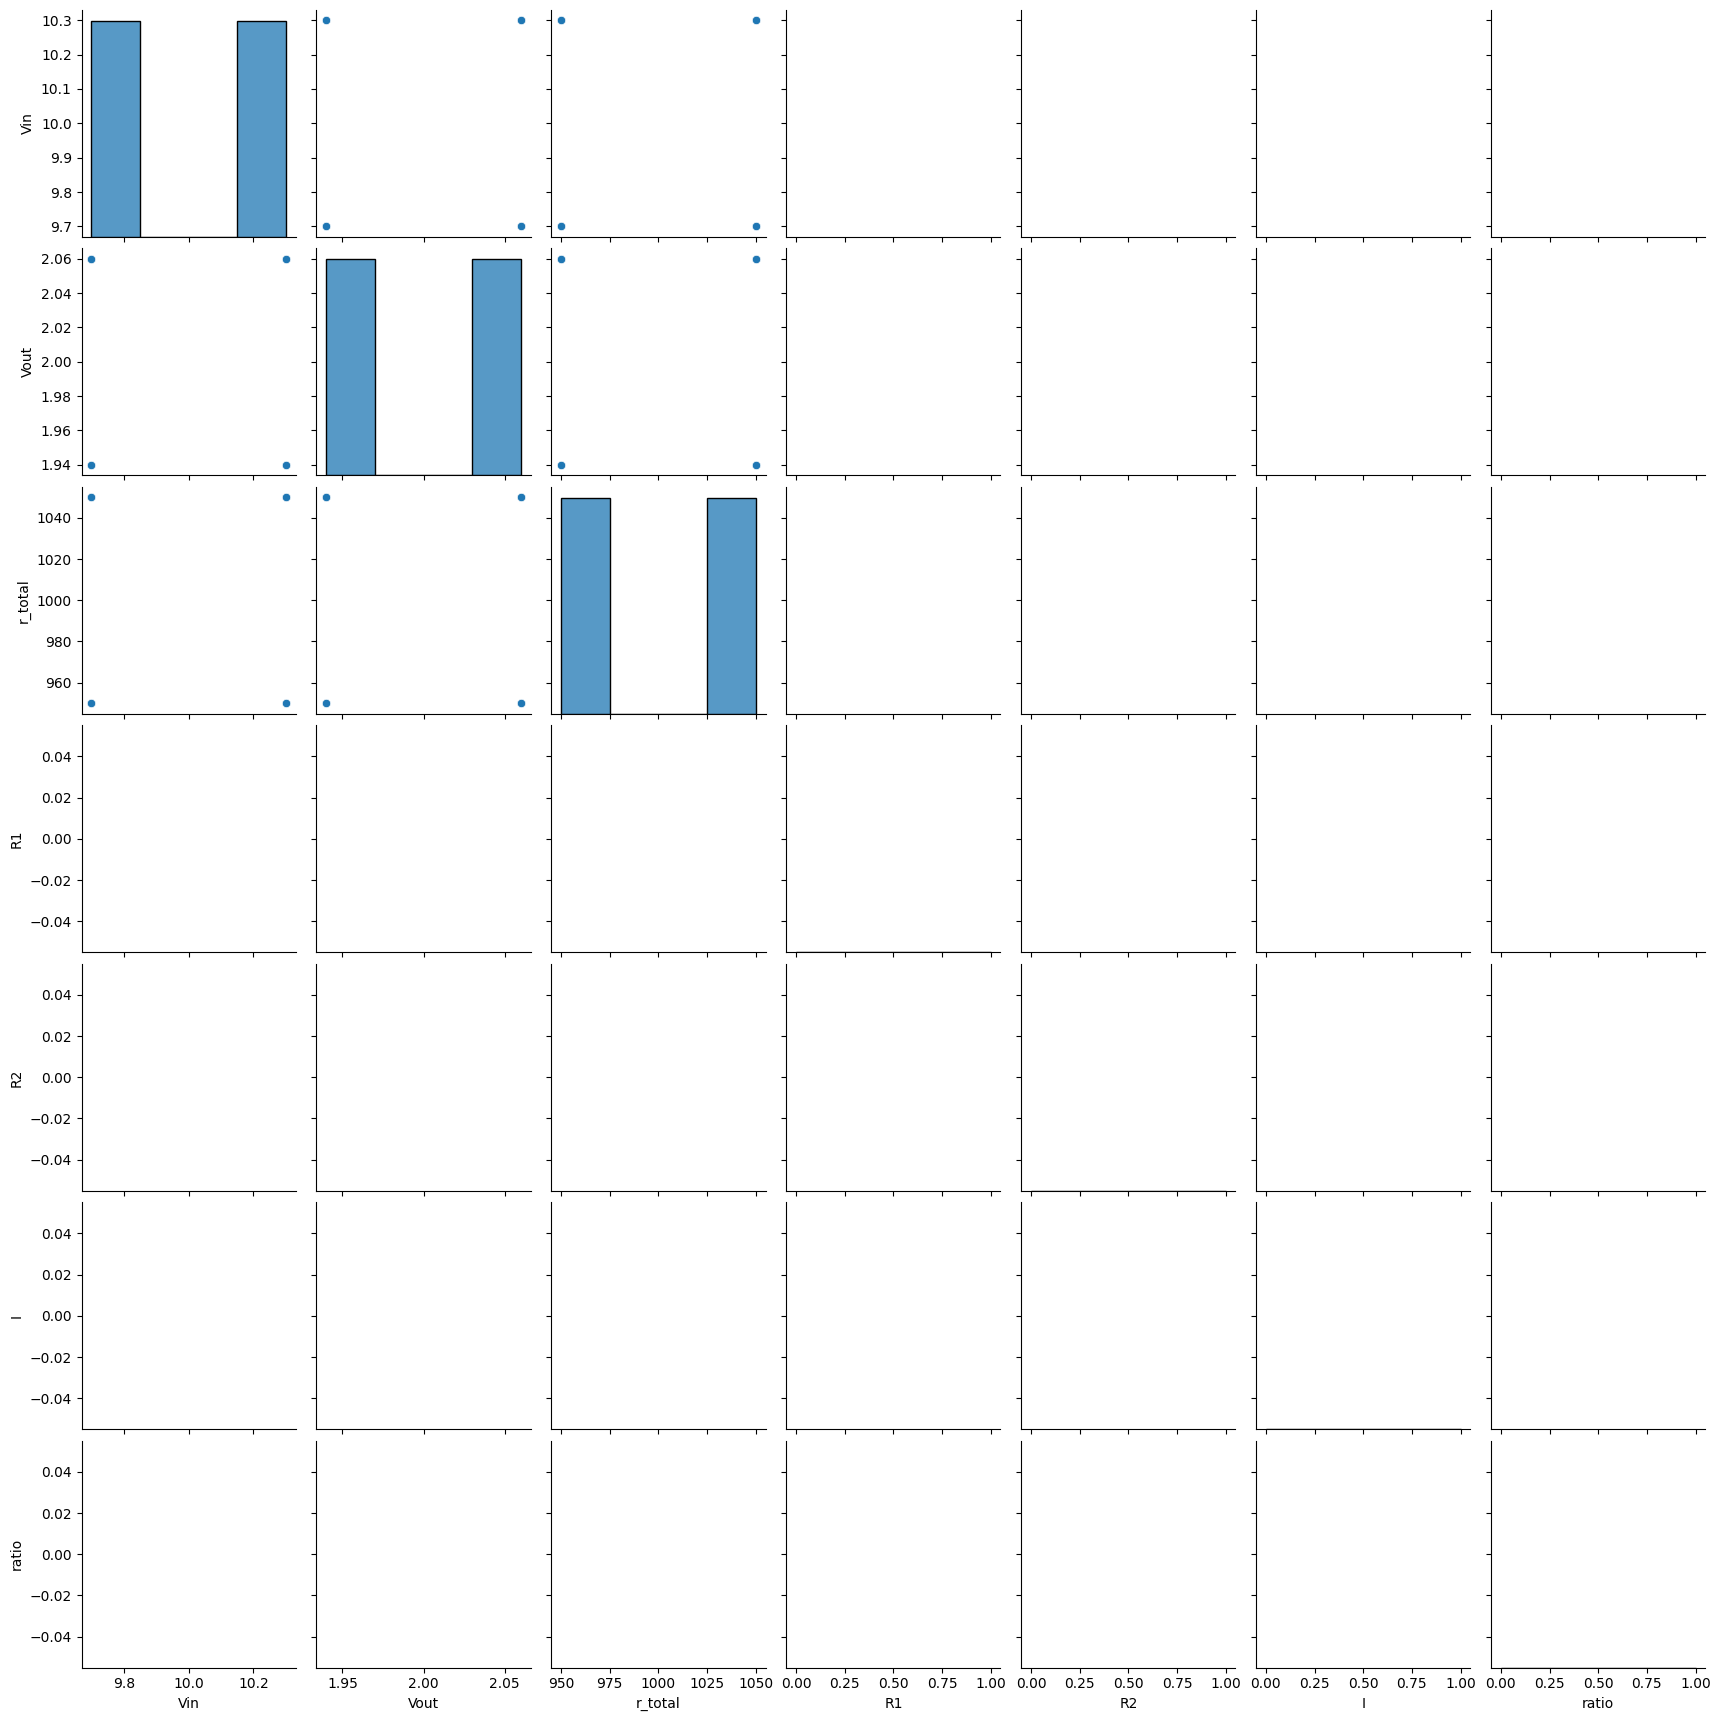

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_solution_space(solutions):
    # Create a DataFrame from the solution tuples
    data = []
    for solution_dict in solutions:
        values = solution_dict['Values']
        sol_set = solution_dict['Solution']
        for sol in sol_set:
            # Evaluate the solution expressions into floats
            r1_val = sol[R1].evalf() if R1 in sol else None
            r2_val = sol[R2].evalf() if R2 in sol else None
            i_val = sol[I].evalf() if I in sol else None
            ratio_val = sol[ratio].evalf() if ratio in sol else None
            # Append a new row to the data list
            data.append({**values, 'R1': r1_val, 'R2': r2_val, 'I': i_val, 'ratio': ratio_val})

    df = pd.DataFrame(data)

    # Create a pair plot
    sns.pairplot(df)
    plt.show()

# Call the function with your solutions
plot_solution_space(valid_solutions)


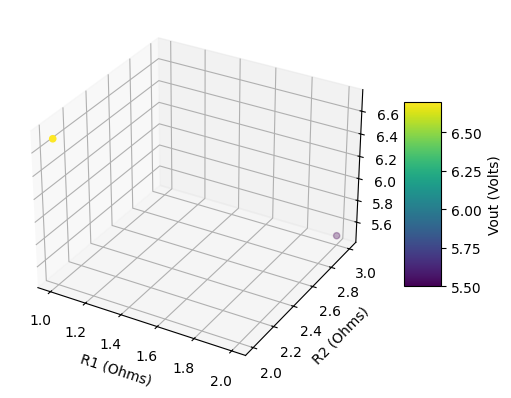

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import N

# Sample data: replace this with your actual list of solution dictionaries
# solutions = [
#     {'R1': 1, 'R2': 2, 'Vout': 6.7},
#     {'R1': 2, 'R2': 3, 'Vout': 5.5},
#     # ... add all your solutions here
# ]

# Prepare the data for plotting
R1_values = [float(N(sol['R1'])) for sol in solutions if 'R1' in sol]
R2_values = [float(N(sol['R2'])) for sol in solutions if 'R2' in sol]
Vout_values = [float(N(sol['Vout'])) for sol in solutions if 'Vout' in sol]

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on Vout values
sc = ax.scatter(R1_values, R2_values, Vout_values, c=Vout_values, cmap='viridis')

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Vout (Volts)')

# Set labels
ax.set_xlabel('R1 (Ohms)')
ax.set_ylabel('R2 (Ohms)')
ax.set_zlabel('Vout (Volts)')

# Show plot
plt.show()
